# South Park Dialogues 
## Goal: Guess who’s talking?
### The dataset is annotated with Season,Episode,Character,Line. By using the `line`, can
### you predict who is the character that said it `Character`? The `Character` can be one of
### the characters in the animated series South Park.

## Import all labraries to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import time
import pickle
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [351]:
#from google.colab import drive
#drive.mount('/content/drive')

In [352]:
#cd /content/drive/'My Drive'/Colab Notebooks/Indexation_contenu/TP2/text-classification-KN-Kevinoh/South Park Dialogues/

## __Step__ 1 : Data gathering and data analysis
### Load South Park Dialogues

In [2]:
dataset = pd.read_csv("south_park_dialogues_dataset.csv")

In [3]:
dataset.dtypes

Season       object
Episode      object
Character    object
Line         object
dtype: object

In [4]:
print("Our dataset has : {} entries and {} features, {}".format(dataset.shape[0], dataset.shape[1], dataset.columns.values))

Our dataset has : 70896 entries and 4 features, ['Season' 'Episode' 'Character' 'Line']


In [5]:
dataset.head()

Season Episode Character                                               Line
0     10       1      Stan         You guys, you guys! Chef is going away. \n
1     10       1      Kyle                        Going away? For how long?\n
2     10       1      Stan                                         Forever.\n
3     10       1      Chef                                  I'm sorry boys.\n
4     10       1      Stan  Chef said he's been bored, so he joining a gro...

### The Characters with most talk in order, are: 
<table text-align='left'>
<td>
    <ul>
        <li> Cartman - 9774 lines</li>
        <li>    Stan - 7680 lines</li>
        <li>    Kyle - 7099 lines</li>
        <li> Butters - 2602 lines</li>
        <li> Randy   - 2467 lines</li>
        <li> etc..</li>
    </ul>
</td>
</table>

In [6]:
dataset['Character'].unique()

array(['Stan', 'Kyle', 'Chef', ..., 'Father Barnes', 'Cardinal Mallory',
       'Blind Man'], dtype=object)

In [7]:
dataset.describe()

Season Episode Character     Line
count   70896   70896     70896    70896
unique     19      19      3950    64301
top         2      10   Cartman  What?\n
freq     6416    5271      9774      361

### Line per Character 

In [8]:
dataset.Character.value_counts()

Cartman            9774
Stan               7680
Kyle               7099
Butters            2602
Randy              2467
                   ... 
Shopper 12            1
Marcia                1
Cowlick Vampire       1
Biker 11              1
Resident 12           1
Name: Character, Length: 3950, dtype: int64

### As we see on our pie diagram down, we conclude that Chartman is the one who had the most talk in South Park Dialogues, then come Stan and Kyle

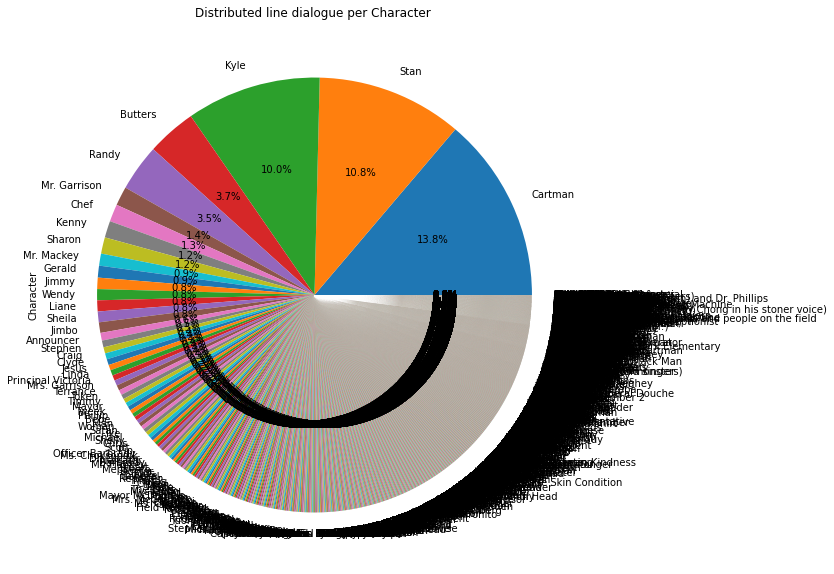

In [9]:
 _ = dataset.Character.value_counts().plot(kind='pie', autopct="%1.1f%%", figsize=(10,10), title='Distributed line dialogue per Character ')

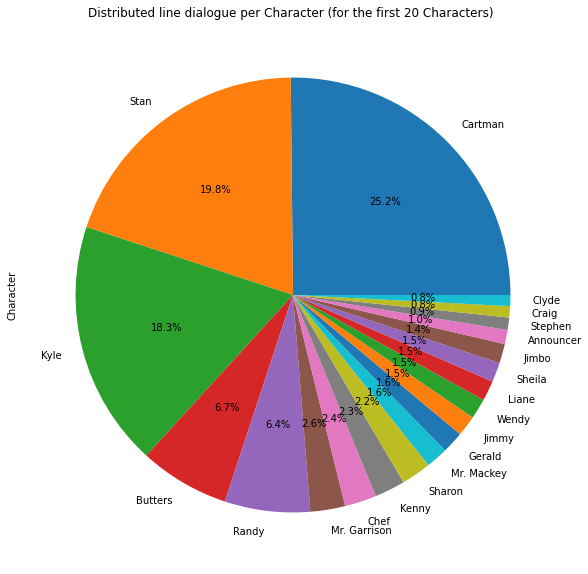

In [12]:
_ = (dataset.Character.value_counts())[:20].plot(kind='pie', autopct="%1.1f%%", figsize=(10,10), title='Distributed line dialogue per Character (for the first 20 Characters) ')

### Line per Episode
#### The shottest episode had 17 Lines, and the longest had 5271 Lines

In [13]:
dataset.Episode.value_counts()

10         5271
1          5129
4          5103
8          4903
7          4881
5          4859
6          4814
2          4769
3          4717
9          4638
12         4549
11         4313
13         4266
14         3981
15         1636
16         1327
17         1326
18          397
Episode      17
Name: Episode, dtype: int64

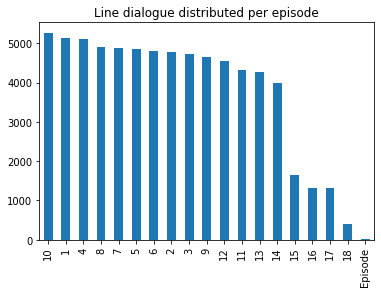

In [14]:
dataset.Episode.value_counts().plot(kind='bar', title='Line dialogue distributed per episode')

In [15]:
!pip install plotly

In [10]:
import plotly.offline as pyo
import plotly.graph_objs as go
lowerdf1 = dataset.groupby('Episode').size()/dataset['Line'].count()*100
labels = lowerdf1.index
values = lowerdf1.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, title='Distribution of Line per Episode')])
fig.show()

### Line per Season
#### The shottest season had 17 Lines, and the longest had 6416 Lines

In [17]:
dataset.Season.value_counts()

2         6416
3         5798
4         5680
6         5131
5         4414
7         4236
1         4170
8         3601
9         3526
11        3478
10        3471
14        3346
12        3307
13        3257
16        3120
15        3101
18        2522
17        2305
Season      17
Name: Season, dtype: int64

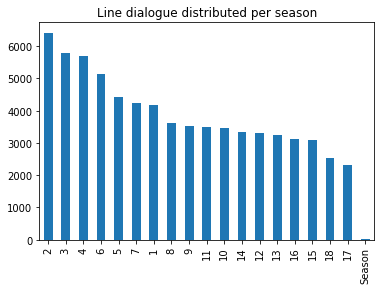

In [18]:
_ = dataset.Season.value_counts().plot(kind='bar', title='Line dialogue distributed per season')

In [11]:
import plotly.offline as pyo
import plotly.graph_objs as go
lowerdf1 = dataset.groupby('Season').size()/dataset['Line'].count()*100
labels = lowerdf1.index
values = lowerdf1.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, title='Distribution of Line per Season')])
fig.show()

# Data preprocessing

In [20]:
# Install spaCy 
!pip install  spacy

# install nltk
!pip install  nltk

# Download the large English model for spaCy
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [21]:
import spacy
import nltk

In [22]:
# disable ner and parser to encrease nlp speed
nlp = spacy.load('en_core_web_sm',  disable=['ner', 'parser'])

In [23]:
class Data_Preprocessing:
    def __init__(self, _data):
        self.data = _data
        self.tokens = list()
        self.punctuations = list(string.punctuation)
    
    
    def transform_tokens_to_sequence(self,line_tokens):
        self.tokens = ' '.join(line_tokens)
        return self.tokens
    
    
    def WordLemmatized(self):
        # for each word tokenize and lemmatize
        def lemmatize(line):
            # tokenization & stopword remove & lemmatization
            self.tokens = [token.lemma_ for token in nlp(str(line)) if not token.is_stop]
            # remove non aphabetic 
            self.tokens = [token.lower() for token in self.tokens if token.isalpha()]
            # remove ponctuations
            self.tokens = [token for token in self.tokens if token not in self.punctuations]
            
            if len(self.tokens) > 1:
                return self.tokens
            
            return [] #return empty list
        
        start = time.time()
        
        # tokenize all Line for each characters and add clean data
        # speed up cleaning process with multiprocessing and batch data size
        self.data['Clean_Line_Tokens'] = [lemmatize(line) for line in nlp.pipe(self.data.Line.values.tolist(),
                                                                        batch_size=5000, n_threads=-1)]
        # tokens_to_sequence
        self.data['Clean_Dialogues'] = self.data['Clean_Line_Tokens'].apply(self.transform_tokens_to_sequence)
        
        # tokens length
        self.data['Line_length'] = self.data['Clean_Line_Tokens'].apply(lambda tokens: len(tokens))
        
        print('Cleanning elapse time: {} mins'.format(round((time.time() - start) / 60, 2)))
    
    def preprocess(self):
        if not os.path.isfile('data_clean.pkl'):
            self.WordLemmatized()
            self.data.to_pickle('data_clean.pkl')
        else:
            self.data = pd.read_pickle('data_clean.pkl')

In [24]:
data_clean = Data_Preprocessing(dataset)

In [25]:
data_clean.preprocess()

### Checking for missing values

In [26]:
dataset = data_clean.data
dataset.groupby('Line_length').count()

Season  Episode  ...  Clean_Line_Tokens  Clean_Dialogues
Line_length                   ...                                    
0             14947    14947  ...              14947            14947
2             11298    11298  ...              11298            11298
3              9273     9273  ...               9273             9273
4              7536     7536  ...               7536             7536
5              6013     6013  ...               6013             6013
...             ...      ...  ...                ...              ...
120               2        2  ...                  2                2
122               1        1  ...                  1                1
123               1        1  ...                  1                1
126               1        1  ...                  1                1
129               1        1  ...                  1                1

[95 rows x 6 columns]

### As we had observed, we have 14947 Lines dialogues with zero tokens, the we must drop them. And work with 55949 not zero tokens length

In [27]:
data_clean.data.Line_length.describe()

count    70896.000000
mean         4.922873
std          6.004310
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        129.000000
Name: Line_length, dtype: float64

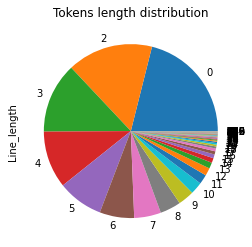

In [28]:
_= dataset.Line_length.value_counts().plot(kind='pie', title='Tokens length distribution')

### Drop all with empty tokens after data preprocessing

In [29]:
dataset = dataset[dataset.Line_length != 0]

### Verify by getting statistic resume from Line_length column

In [30]:
dataset.Line_length.describe()

count    55949.000000
mean         6.238038
std          6.122016
min          2.000000
25%          3.000000
50%          4.000000
75%          7.000000
max        129.000000
Name: Line_length, dtype: float64

In [31]:
dataset.head()

Season  ... Line_length
0     10  ...           5
1     10  ...           3
3     10  ...           2
4     10  ...           9
6     10  ...           9

[5 rows x 7 columns]

# Bag of word (Document Term matrix - DTM)

### Featurization, using 1, 2 gram

In [32]:
# We are going to create a document-term matrix using CountVectorizer
from sklearn.feature_extraction.text import  TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(np.hstack(dataset['Clean_Line_Tokens'])[:500])

pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())

adventure  adventurer  africa  afternoon  ...   ya  yeah  yes  young
0          0.0         0.0     0.0        0.0  ...  0.0   0.0  0.0    0.0
1          0.0         0.0     0.0        0.0  ...  0.0   0.0  0.0    0.0
2          0.0         0.0     0.0        0.0  ...  0.0   0.0  0.0    0.0
3          0.0         0.0     0.0        0.0  ...  0.0   0.0  0.0    0.0
4          0.0         0.0     0.0        0.0  ...  0.0   0.0  0.0    0.0
..         ...         ...     ...        ...  ...  ...   ...  ...    ...
495        1.0         0.0     0.0        0.0  ...  0.0   0.0  0.0    0.0
496        0.0         0.0     0.0        0.0  ...  0.0   0.0  0.0    0.0
497        0.0         0.0     0.0        0.0  ...  0.0   0.0  0.0    0.0
498        0.0         0.0     0.0        0.0  ...  0.0   0.0  0.0    0.0
499        0.0         0.0     0.0        0.0  ...  0.0   0.0  0.0    0.0

[500 rows x 229 columns]

In [33]:
print(vectorizer.get_feature_names(), len(vectorizer.get_feature_names()))

['adventure', 'adventurer', 'africa', 'afternoon', 'ahh', 'amazon', 'answer', 'anymore', 'arrest', 'ask', 'ass', 'asshole', 'attention', 'away', 'ball', 'bank', 'believe', 'belong', 'bet', 'black', 'boob', 'bored', 'boy', 'bud', 'buttered', 'buy', 'bye', 'cafeteria', 'call', 'camp', 'card', 'care', 'chef', 'child', 'choice', 'climb', 'club', 'come', 'confuse', 'connolly', 'course', 'decide', 'deeply', 'detective', 'difficult', 'doll', 'draw', 'dude', 'east', 'erect', 'esquire', 'everybody', 'excuse', 'explore', 'fantasy', 'fatass', 'feel', 'ffriend', 'finally', 'find', 'food', 'friend', 'fruitful', 'fuh', 'funny', 'get', 'glad', 'go', 'goddammit', 'good', 'great', 'group', 'guess', 'guy', 'hanimi', 'happen', 'happy', 'head', 'heart', 'hello', 'hey', 'hi', 'himalayas', 'hit', 'ho', 'home', 'hope', 'house', 'huh', 'hunting', 'important', 'information', 'inside', 'interesting', 'jarvis', 'jew', 'jewbs', 'jewish', 'jimbo', 'join', 'kayak', 'kenny', 'kid', 'kilimanjaro', 'kind', 'know', 'ky

# Exploratory Data Analysis (EDA)

### Co - Occurences of each chunks

In [34]:
freq = nltk.FreqDist(np.hstack(dataset['Clean_Line_Tokens']))
print(freq)

<FreqDist with 19844 samples and 349012 outcomes>


In [35]:
freq

FreqDist({'guy': 2564,
          'chef': 414,
          'go': 4865,
          'away': 638,
          'long': 573,
          'sorry': 812,
          'boy': 1644,
          'say': 1259,
          'bored': 15,
          'join': 170,
          'group': 124,
          'call': 430,
          'super': 175,
          'adventure': 54,
          'club': 119,
          'kind': 468,
          'question': 219,
          'think': 2815,
          'world': 631,
          'to': 3194,
          'answer': 184,
          'meaning': 19,
          'life': 599,
          'hope': 273,
          'make': 500,
          'right': 3274,
          'choice': 125,
          'miss': 251,
          'know': 3702,
          'tell': 1703,
          'dude': 1963,
          'fuh': 5,
          'f': 70,
          'ffriend': 1,
          'heart': 181,
          'bye': 132,
          'good': 1869,
          'great': 810,
          'time': 2002,
          'draw': 30,
          'card': 67,
          'fatass': 139,
          'rev

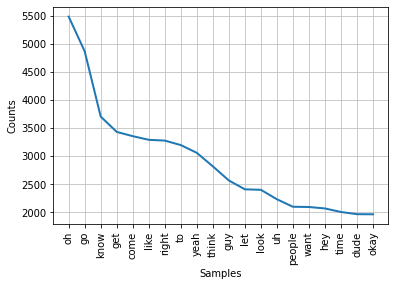

In [36]:
_ = freq.plot(20, cumulative=False)

#### We had figured out that, the most occurent word is "oh", then "go", etc... 

### Draw word cloud to show the evidence of that case. Then we can visualize the most frequent word found, as predicted from wordcloud graph 

In [37]:
# install wordCloud module

#!pip install WordCloud
from wordcloud import WordCloud

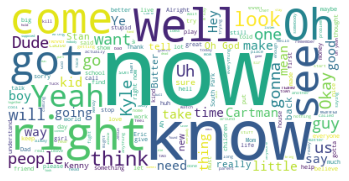

In [38]:
wordcloud = WordCloud(background_color='white').generate(' '.join(dataset.Line))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Display wordcloud of the first 36 characters ' Line, and visualize most frequent word in foreground.

In [39]:
#Shuffle data
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

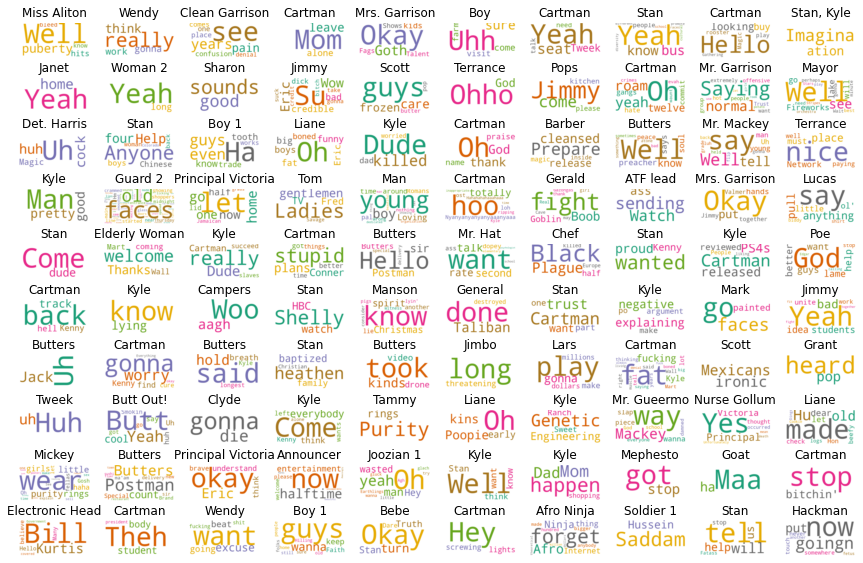

In [40]:
plt.rcParams['figure.figsize'] = [15, 10]

full_names = dataset.Character.values.tolist()

wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)
# Create subplots for each comedian
for index, character in enumerate(dataset.Character):
    wc.generate(dataset['Line'].values[index])
    
    if index > 99:
        break
    
    plt.subplot(10, 10, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

    
plt.show()

# NLP Techniques

## Machine Learning algorithms

In [41]:
!pip install -U numpy

Requirement already up-to-date: numpy in /usr/local/lib/python3.7/dist-packages (1.20.1)


In [42]:
# importation modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
# ML algorithm
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC,LinearSVC, NuSVC


import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [43]:
class ML_NLP:
    def __init__(self, data, labels):
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
        print(self.X_train.shape, '-', self.X_test.shape)
        vectorizer = TfidfVectorizer(ngram_range=(1, 2))
        self.X_train_tfidf = vectorizer.fit_transform(self.X_train)
        self.X_test_tfidf = vectorizer.transform(self.X_test)
        print('Vectors:',self.X_train_tfidf.shape, '-', self.X_test_tfidf.shape)
    
    # training
    def model_fit(self, model):
        self.clf = model.fit(self.X_train_tfidf, self.Y_train)
    
    # classification report
    def classificationReport(self):
        self.Y_pred = self.clf.predict(self.X_test_tfidf)

        print(classification_report(self.Y_test, self.Y_pred))
    
    # confusion matrix
    def confusionMatrix(self):
        sns.heatmap(confusion_matrix(self.Y_test, self.Y_pred), annot=True, cbar=True, xticklabels=set(self.Y_test), yticklabels=set(self.Y_test))
        plt.ylabel('Vraies classes')
        plt.xlabel('Classes prédites')
        plt.show()
          
    # classification
    def classify(self, *_classifiers):
        self.classifiers = _classifiers
        for _classifier in self.classifiers:
            self.model_fit(_classifier)
            print("________________________________________________________________________________________________________________")
            print("################################################################################################################\n"
                  ,str(_classifier))
            print("###########################CLASSIFICATION REPORT##############################")
            self.classificationReport()
            #print("###########################CONFUSION MATRIX##############################")
            #self.confusionMatrix()

## Models performance on intial data (Line)
### NB: display only the classification report since drawing confusion matrix is not very lisible beacause much class

### For the main raisons of ressources, we use only a sub sample of our dataset for evaluation (5000)

In [44]:
NB_SAMPLES = 3000
data = dataset.Line.values[:NB_SAMPLES]
labels = dataset.Character.values.tolist()[:NB_SAMPLES]

##### DATASET SPLIT INTO TRAIN AND TEST

In [45]:
model_classifier = ML_NLP(data, labels)

(2400,) - (600,)
Vectors: (2400, 24343) - (600, 24343)


In [46]:
model_classifier.classify(MultinomialNB(fit_prior=False),
                          BernoulliNB(),
                          LinearSVC(),
                          SVC(),
                          LogisticRegression(),
                          SGDClassifier(),
                          RandomForestClassifier(),
                          DecisionTreeClassifier())

________________________________________________________________________________________________________________
################################################################################################################
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)
###########################CLASSIFICATION REPORT##############################
                       precision    recall  f1-score   support

                A Boy       0.00      0.00      0.00         0
           A Musician       0.00      0.00      0.00         0
      Abraham Lincoln       0.00      0.00      0.00         1
         Adams County       0.00      0.00      0.00         1
           Afro Ninja       0.00      0.00      0.00         1
              Agent 2       0.00      0.00      0.00         1
           Agent Keen       0.00      0.00      0.00         1
           Agent Marx       0.00      0.00      0.00         1
               Amanda       0.00      0.00      0.00         1
   

#### Results interpretation

Considering the limits of our resources (8G0 locally, 12 Go colab), locally or on colab, we had to limit ourselves to a sample of the first 3000 Lines of our dataset.
For 600 test data unevenly distributed between the classes (more classes in 1 elements), we obtain the following performances:
* MultinomialNB: 16%
* BernouilliNB: 14%
* LinearSVC: 16%
* SVC: 16%
* LOR: 15%
* SGDClassifier: 15%
* RandomForestClassifier: 17%
* DecisionTreeClassifier: 12%

## Models performance on cleaning data (Line)
### NB: display only the classification report since drawing confusion matrix is not very lisible beacause much class

In [47]:
data = dataset.Clean_Dialogues.values[:NB_SAMPLES]
labels = dataset.Character.values.tolist()[:NB_SAMPLES]

##### DATASET SPLIT INTO TRAIN AND TEST

In [48]:
model_classifier = ML_NLP(data, labels)

(2400,) - (600,)
Vectors: (2400, 14822) - (600, 14822)


In [49]:
model_classifier.classify(MultinomialNB(fit_prior=False),
                          BernoulliNB(),
                          LinearSVC(),
                          SVC(),
                          LogisticRegression(),
                          SGDClassifier(),
                          RandomForestClassifier(),
                          DecisionTreeClassifier())

________________________________________________________________________________________________________________
################################################################################################################
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)
###########################CLASSIFICATION REPORT##############################
                       precision    recall  f1-score   support

                A Boy       0.00      0.00      0.00         0
           A Musician       0.00      0.00      0.00         0
      Abraham Lincoln       0.00      0.00      0.00         1
         Adams County       0.00      0.00      0.00         1
           Afro Ninja       0.00      0.00      0.00         1
              Agent 2       0.00      0.00      0.00         1
           Agent Keen       0.00      0.00      0.00         1
           Agent Marx       0.00      0.00      0.00         1
              Al Gore       0.00      0.00      0.00         0
   

#### Results interpretation

Considering the limits of our resources (8G0 locally, 12 Go colab), locally or on colab, we had to limit ourselves to a sample of the first 3000 Lines of our dataset.
For 600 test data unevenly distributed between the classes (more classes in 1 elements), we obtain the following performances:
* MultinomialNB: 17%
* BernouilliNB: 14%
* LinearSVC: 17%
* SVC: 15%
* LOR: 16%
* SGDClassifier: 15%
* RandomForestClassifier: 15%
* DecisionTreeClassifier: 12%

## Deep Learning

In [50]:
NB_SAMPLES = len(dataset.Line.values)
data = dataset.Clean_Dialogues.values[:NB_SAMPLES]
labels = dataset.Character.values.tolist()[:NB_SAMPLES]

In [51]:
import ast
from nn_utils import TrainingHistory
from tensorflow.keras.layers import Dense, Embedding, Input
from tensorflow.keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten, GlobalMaxPooling1D, LSTM, RNN
from tensorflow.keras.models import Model
import itertools
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import ( precision_recall_fscore_support, 
                             accuracy_score)

from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.layers import Concatenate

import tensorflow as tf

In [66]:
MAX_FEATURES = 10000
MAX_TEXT_LENGTH = 1024 
EMBEDDING_SIZE  = 300
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.4

In [67]:
# Get all Character list
CLASSES_LIST = np.unique(dataset['Character'])
n_out = len(CLASSES_LIST)

print(CLASSES_LIST, n_out)

['A Banana' 'A Bishop' 'A Boy' ... 'Zombie Mortician' 'Zytar' 'al-Zawahri'] 3458


### Split data

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [69]:
# Convertir la chaîne de classe en index (entiers)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CLASSES_LIST)

test_lab = y_test

y_train_encoded = le.transform(y_train) 
y_test_encoded = le.transform(y_test) 
train_y_cat = to_categorical(y_train_encoded, n_out)

In [70]:
y_train_encoded[:5], len(y_train_encoded)

(array([2980,  328,  866, 2847,  548]), 44759)

In [71]:
len(y_test)

11190

In [72]:
#Onehot encoding
train_y_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [73]:
#Text to sequence
def get_train_test(train_raw_text, test_raw_text):

    tokenizer = text.Tokenizer(num_words=MAX_FEATURES)

    tokenizer.fit_on_texts(list(train_raw_text))

    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)

    return sequence.pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), \
           sequence.pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH)



def get_model():
    inputs = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(MAX_FEATURES, EMBEDDING_SIZE)(inputs)
    model = Dropout(0.2)(model)
    ngram_filters = [2, 3, 4] # YOUR CODE HERE Modifier les valeurs n-gramme
    filters = [300]*3

    convs = []
    for kernel_size, filter_length in zip(ngram_filters, filters):
        conv = Conv1D(filters=filter_length,
                      kernel_size=kernel_size,
                      padding='same',
                      activation='relu')(model)

        convs.append(conv)

    model = Concatenate()(convs)
    model = GlobalMaxPooling1D()(model)    

    outputs = Dense(n_out, activation="softmax")(model)
    model = Model(inputs=inputs, outputs=outputs)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

def train_fit_predict(model, X_train, X_test, y, history):

    model.fit(X_train, y,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1,
              validation_split=VALIDATION_SPLIT)

    return model.predict(X_test)

#### get data in correct format 

In [74]:
x_vec_train, x_vec_test = get_train_test(X_train, X_test)
len(x_vec_train), len(x_vec_test)

(44759, 11190)

In [75]:
# use first the define cnn in TP
model = get_model()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1024, 300)    3000000     input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 1024, 300)    0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 1024, 300)    180300      dropout_1[0][0]                  
____________________________________________________________________________________________

In [76]:
# training process
history = TrainingHistory(x_vec_test, y_test_encoded, CLASSES_LIST)

# Train and predict
y_predicted = train_fit_predict(model, x_vec_train, x_vec_test, train_y_cat, history).argmax(1)

Epoch 1/10
1679/1679 [==============================] - 111s 66ms/step - loss: 5.4632 - accuracy: 0.1626 - val_loss: 5.0508 - val_accuracy: 0.1974
Epoch 2/10
1679/1679 [==============================] - 110s 66ms/step - loss: 4.6951 - accuracy: 0.2222 - val_loss: 5.0563 - val_accuracy: 0.2163
Epoch 3/10
1679/1679 [==============================] - 110s 65ms/step - loss: 4.0100 - accuracy: 0.2861 - val_loss: 5.3085 - val_accuracy: 0.2173
Epoch 4/10
1679/1679 [==============================] - 111s 66ms/step - loss: 3.2900 - accuracy: 0.3565 - val_loss: 5.8616 - val_accuracy: 0.2198
Epoch 5/10
1679/1679 [==============================] - 110s 65ms/step - loss: 2.4652 - accuracy: 0.4673 - val_loss: 6.7718 - val_accuracy: 0.2112
Epoch 6/10
1679/1679 [==============================] - 110s 65ms/step - loss: 1.6935 - accuracy: 0.6088 - val_loss: 7.9696 - val_accuracy: 0.2072
Epoch 7/10
1679/1679 [==============================] - 110s 65ms/step - loss: 1.1520 - accuracy: 0.7252 - val_loss: 9

#### Classification report and confusion matrix

In [77]:
len(y_test_encoded), len(y_predicted), len(y_test)

(11190, 11190, 11190)

In [79]:
print(classification_report(y_test_encoded, y_predicted, target_names=y_test[:1916]))

                             precision    recall  f1-score   support

                      Mimsy       0.00      0.00      0.00         1
                      Janet       0.00      0.00      0.00         1
                   Al Roker       0.00      0.00      0.00         1
                 Dr. Doctor       0.00      0.00      0.00         1
                 Mr. Mackey       0.00      0.00      0.00         0
                     Harris       0.00      0.00      0.00         1
                     Shelly       0.00      0.00      0.00         1
                    Cartman       0.00      0.00      0.00         1
                     Saddam       0.00      0.00      0.00         1
                   The Coon       0.00      0.00      0.00         2
                     Mackey       0.00      0.00      0.00         1
                   A Banana       0.00      0.00      0.00         0
               Hall Monitor       0.00      0.00      0.00         1
                    Butters      

### MY CNN Model

In [82]:
def get_model_cnn():
    inputs = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(MAX_FEATURES, EMBEDDING_SIZE)(inputs)
    model = Dropout(0.2)(model)
    ngram_filters = [i for i in range(1,11)] # YOUR CODE HERE Modifier les valeurs n-gramme
    filters = [i * 50 for i in range(1, len(ngram_filters))]

    layers = []
    for kernel_size, filter_length in zip(ngram_filters, filters):
        conv = Conv1D(filters=filter_length,
                      kernel_size=kernel_size,
                      activation='relu', 
                      padding='same',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(model)
     
        #_layer = tf.keras.layers.MaxPool1D()(conv)
        #_layer = tf.keras.layers.Dropout(0.2)(_layer)

        layers.append(conv)
  
    model = Concatenate()(layers) 
    model = tf.keras.layers.BatchNormalization()(model)
    model = GlobalMaxPooling1D()(model)
    model = tf.keras.layers.Dropout(0.2)(model)
    
    model = Dense(2*n_out, activation="relu")(model)
    outputs = Dense(n_out, activation="softmax")(model)
    model = Model(inputs=inputs, outputs=outputs)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

model_cnn = get_model_cnn()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1024, 300)    3000000     input_4[0][0]                    
__________________________________________________________________________________________________
dropout_13 (Dropout)            (None, 1024, 300)    0           embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_15 (Conv1D)              (None, 1024, 50)     15050       dropout_13[0][0]                 
____________________________________________________________________________________________

In [83]:
# Train and predict
y_predicted = train_fit_predict(model_cnn, x_vec_train, x_vec_test, train_y_cat, history).argmax(1)

Epoch 1/10
1679/1679 [==============================] - 249s 148ms/step - loss: 7.4001 - accuracy: 0.1446 - val_loss: 6.3104 - val_accuracy: 0.1632
Epoch 2/10
1679/1679 [==============================] - 247s 147ms/step - loss: 5.9933 - accuracy: 0.1629 - val_loss: 51.1453 - val_accuracy: 0.1620
Epoch 3/10
1679/1679 [==============================] - 247s 147ms/step - loss: 5.6568 - accuracy: 0.1747 - val_loss: 74.3207 - val_accuracy: 0.1671
Epoch 4/10
1679/1679 [==============================] - 247s 147ms/step - loss: 5.4256 - accuracy: 0.1899 - val_loss: 40.9226 - val_accuracy: 0.1697
Epoch 5/10
1679/1679 [==============================] - 247s 147ms/step - loss: 5.2087 - accuracy: 0.1978 - val_loss: 23.1141 - val_accuracy: 0.1735
Epoch 6/10
1679/1679 [==============================] - 247s 147ms/step - loss: 5.0463 - accuracy: 0.2083 - val_loss: 88.5116 - val_accuracy: 0.1758
Epoch 7/10
1679/1679 [==============================] - 247s 147ms/step - loss: 4.9388 - accuracy: 0.2197 -

#### Classification report

In [85]:
print(classification_report(y_test_encoded, y_predicted, target_names=y_test[:1680]))

                             precision    recall  f1-score   support

                      Mimsy       0.00      0.00      0.00         1
                      Janet       0.00      0.00      0.00         1
                   Al Roker       0.00      0.00      0.00         1
                 Dr. Doctor       0.00      0.00      0.00         1
                 Mr. Mackey       0.00      0.00      0.00         1
                     Harris       0.00      0.00      0.00         1
                     Shelly       0.00      0.00      0.00         1
                    Cartman       0.00      0.00      0.00         1
                     Saddam       0.00      0.00      0.00         2
                   The Coon       0.00      0.00      0.00         1
                     Mackey       0.00      0.00      0.00         1
                   A Banana       0.00      0.00      0.00         1
               Hall Monitor       0.00      0.00      0.00         1
                    Butters      

#### Resultat

As results in our CNN training at the first experiment, we have got accuracy of 18%, for 10 epochs training, because of our imbalance classes in other hand, for our futher experiments we would train over 10 epoch and customize more the neural networks.

# Conclusion

Face aux nombreuses difficultés rencontrées, les perspectives à ce travail sont les suivantes:
* Appliquer une réduction de dimension (PCA ou TruncateSVD)
* Exécuter les algorithmes de machines definis sur l'ensemble de données avec une machine avec suffisamment les ressources (RAM), ou utiliser une approche : ensemble learning qui consistera à diviser notre datasets en sous dataset de taille minimale, puis apprendre sur chaque dataset et en fin fusion les differents modèles obtenus. (to deal with limited resources) 
* Use LSTM model or RNN for alternative